In [77]:
___Author___='LumberJack Jyss'

In [78]:
print('LumberJack BRUTAL AtidotCom XGBOOST\nLumberJack Jyss (c)')

LumberJack BRUTAL AtidotCom XGBOOST
LumberJack Jyss (c)


In [79]:
print('Importation des librairies...')
import statistics
import pickle
#import talib
#import time
#from datetime import date,datetime
import numpy as np
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier
from pandas.plotting import register_matplotlib_converters
import pandas_datareader as web
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
print('Librairies importées')

Importation des librairies...
Librairies importées


In [80]:
df = pd.read_csv('dataset_ready_to_use.csv')

In [81]:
df = df.dropna()

In [82]:
df.set_index('Local time', inplace=True)
df = df.iloc[:,1:]
df.head()

,Open_audusd,High_audusd,Low_audusd,Close_audusd,Volume_audusd,Open_usdjpy,High_usdjpy,Low_usdjpy,Close_usdjpy,Volume_usdjpy,...,Close_eurusd,Volume_eurusd,Macdsignal_eurusd,rsi_eurusd,BBup_eurusd,BBmid_eurusd,BBlow_eurusd,atr_eurusd,wclprince_eurusd,trend
Local time,,,,,,,,,,,,,,,,,,,,,
10.04.2004 02:00:00.000 GMT+0200,0.76255,0.76255,0.76255,0.76255,0.0,106.39,106.39,106.39,106.39,0.0,...,1.20888,0.0,-0.003009,37.355005,1.210666,1.209442,1.208217,0.001222,1.20888,0.0
10.04.2004 03:00:00.000 GMT+0200,0.76255,0.76255,0.76255,0.76255,0.0,106.39,106.39,106.39,106.39,0.0,...,1.20888,0.0,-0.003035,37.355005,1.210610,1.209471,1.208331,0.001134,1.20888,0.0
10.04.2004 04:00:00.000 GMT+0200,0.76255,0.76255,0.76255,0.76255,0.0,106.39,106.39,106.39,106.39,0.0,...,1.20888,0.0,-0.003060,37.355005,1.210553,1.209414,1.208275,0.001053,1.20888,0.0
10.04.2004 05:00:00.000 GMT+0200,0.76255,0.76255,0.76255,0.76255,0.0,106.39,106.39,106.39,106.39,0.0,...,1.20888,0.0,-0.003084,37.355005,1.210526,1.209373,1.208219,0.000978,1.20888,0.0
10.04.2004 06:00:00.000 GMT+0200,0.76255,0.76255,0.76255,0.76255,0.0,106.39,106.39,106.39,106.39,0.0,...,1.20888,0.0,-0.003107,37.355005,1.210429,1.209311,1.208192,0.000908,1.20888,0.0


In [83]:
#delta = round((date(simanim.index[simanim.shape[0]-1].year,\
 #                   simanim.index[simanim.shape[0]-1].month,simanim.index[simanim.shape[0]-1].day)\
  #             -date(simanim.index[0].year,simanim.index[0].month,simanim.index[0].day)).days)
delta = df.shape[0]
bloc1 = round(delta*0.8)
bloc2 = delta - bloc1
print("Période d'étude : ",delta)
print('Sur un découpage 80% - 20% de la période : ')
print('Bloc 1 : ',bloc1,' jours \nBloc 2 :',bloc2,' jours')

Période d'étude :  131564
Sur un découpage 80% - 20% de la période : 
Bloc 1 :  105251  jours 
Bloc 2 : 26313  jours


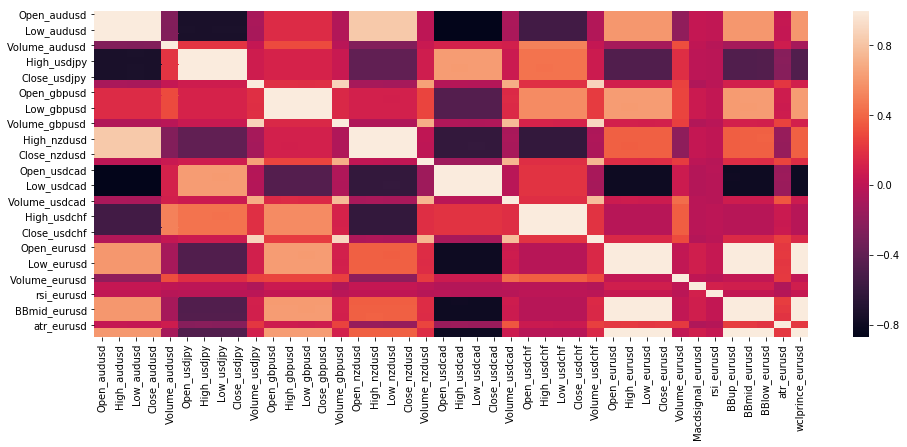

In [84]:
plt.figure(figsize=(16,6))
sns.heatmap(df.iloc[:,:-1].corr())
plt.show()

In [85]:
df['trend'].sum()

5593.0

In [86]:
Xtrain = df.iloc[:bloc1,:-1]
Xtest = df.iloc[bloc1:,:-1]
ytrain = df.iloc[:bloc1,-1]
ytest = df.iloc[bloc1:,-1]

In [87]:
encoder = LabelEncoder()
encoder.fit(ytrain)
encoded_y = encoder.transform(ytrain)
ytrain = encoded_y

In [88]:
ytrain.sum(),ytrain.shape,Xtrain.shape,Xtest.shape,type(ytrain),ytest.sum(),ytest.shape

(4860, (105251,), (105251, 42), (26313, 42), numpy.ndarray, 733.0, (26313,))

In [93]:
from sklearn.ensemble import RandomForestClassifier
boost = RandomForestClassifier(max_depth=6,n_estimators=100)
#boost = XGBClassifier(max_depth=6,learning_rate=0.01,n_estimators=100,booster='gbtree')
boost.fit(Xtrain, ytrain)
p_boost = boost.predict(Xtrain)
score_train = round(boost.score(Xtrain, ytrain) *100,2)
print ("Score Train -->", score_train, " %")

Score Train --> 95.38  %


In [53]:
p_boost.shape,type(p_boost),p_boost.sum()

((105251,), numpy.ndarray, 6)

<Figure size 1152x432 with 0 Axes>

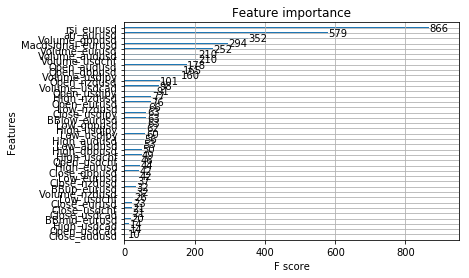

In [54]:
plt.figure(figsize=(16,6))
xgb.plot_importance(boost)

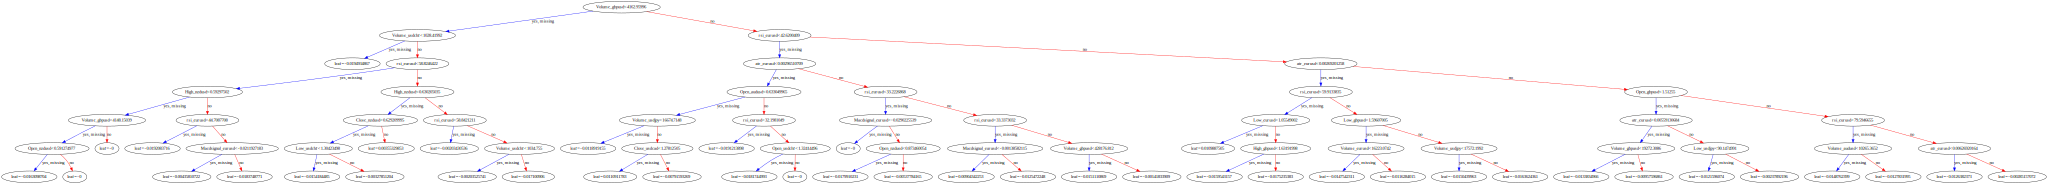

In [55]:
xgb.to_graphviz(boost, num_trees=2)

In [56]:
Xtest.shape

(26313, 42)

In [57]:
y_pred = boost.predict(Xtest)

In [58]:
y_pred.sum(),p_boost.sum(),ytest.sum()

(26, 6, 733.0)

In [59]:
score_test = round(boost.score(Xtest, ytest) *100,2)
print ("Score Test -->", score_test, "%")

Score Test --> 97.15 %


In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
accuracy_score(ytest,y_pred)*100

97.145897465131299

In [64]:
model = XGBClassifier(silent=False,objective='binary:logistic',n_estimators=200)
eval_set=[(Xtrain, ytrain), (Xtest, ytest)]
model.fit(Xtrain, ytrain, eval_metric=['auc','error','logloss'], eval_set=eval_set, verbose=0)

[0]	validation_0-auc:0.775283	validation_0-error:0.046175	validation_0-logloss:0.613872	validation_1-auc:0.777346	validation_1-error:0.027857	validation_1-logloss:0.61038
[1]	validation_0-auc:0.78235	validation_0-error:0.046175	validation_0-logloss:0.549363	validation_1-auc:0.777106	validation_1-error:0.027857	validation_1-logloss:0.542466
[2]	validation_0-auc:0.79082	validation_0-error:0.046175	validation_0-logloss:0.495883	validation_1-auc:0.799527	validation_1-error:0.027857	validation_1-logloss:0.48708
[3]	validation_0-auc:0.794721	validation_0-error:0.046175	validation_0-logloss:0.450726	validation_1-auc:0.810744	validation_1-error:0.027857	validation_1-logloss:0.439126
[4]	validation_0-auc:0.793955	validation_0-error:0.046175	validation_0-logloss:0.412401	validation_1-auc:0.810589	validation_1-error:0.027857	validation_1-logloss:0.398368
[5]	validation_0-auc:0.79388	validation_0-error:0.046175	validation_0-logloss:0.379664	validation_1-auc:0.809502	validation_1-error:0.027857	val

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=1)

In [65]:
predictions = model.predict(Xtest)

In [90]:
accuracy = accuracy_score(ytest, predictions)
precision=precision_score(ytest, predictions) # vrais_positifs/(vrais_positifs+faux_positifs)
# La précision permet de mesurer la capacité du modèle à refuser résultats non-pertinents.
recall=recall_score(ytest, predictions) # (vrai_positifs/(vrais_positifs+faux_négatifs))
roc=roc_auc_score(ytest,predictions)
print('Accuracy: %.2f%%' % (accuracy * 100.0))
print("Precision: %.2f%% " % (precision *100))
print("Recall: %.2f%% " % (recall * 100))
print("AUC: %.2f%% " % (roc *100))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [69]:
# get probabilities for positive class
predictions = model.predict_proba(Xtest)[:,1]
roc = roc_auc_score(ytest, predictions)
print("AUC: %.2f%% " % (roc * 100))

AUC: 81.19% 


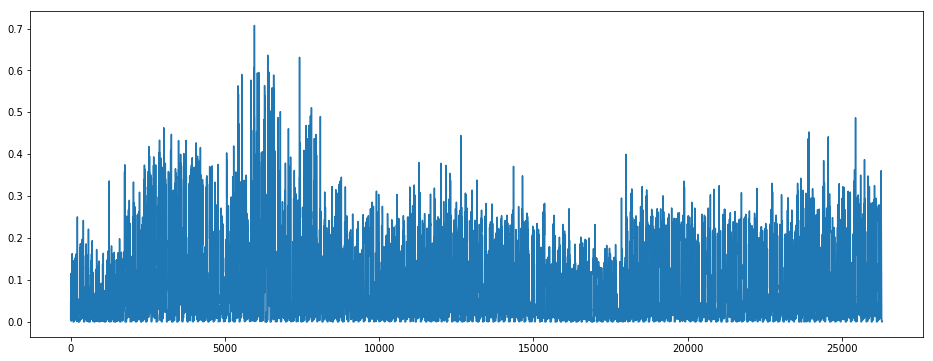

In [76]:
plt.figure(figsize=(16,6))
plt.plot(predictions,)

In [39]:
backtest = df['Close_eurusd']
backtest.index = df.index
backtest.tail()

Local time
13.04.2019 17:00:00.000 GMT+0200    1.13006
13.04.2019 18:00:00.000 GMT+0200    1.13006
13.04.2019 19:00:00.000 GMT+0200    1.13006
13.04.2019 20:00:00.000 GMT+0200    1.13006
13.04.2019 21:00:00.000 GMT+0200    1.13006
Name: Close_eurusd, dtype: float64

In [21]:
#backtest = backtest.iloc[0:-1]

In [22]:
backtest.index = df.index
backtest.tail()

Local time
13.04.2019 17:00:00.000 GMT+0200    1.13006
13.04.2019 18:00:00.000 GMT+0200    1.13006
13.04.2019 19:00:00.000 GMT+0200    1.13006
13.04.2019 20:00:00.000 GMT+0200    1.13006
13.04.2019 21:00:00.000 GMT+0200    1.13006
Name: Close_eurusd, dtype: float64

In [23]:
trend = boost.predict(df.iloc[:,:-1])

In [24]:
trend_df = pd.DataFrame(trend,columns=['trend'])
trend_df.index = df.index
trend_df.tail()

,trend
Local time,
13.04.2019 17:00:00.000 GMT+0200,0
13.04.2019 18:00:00.000 GMT+0200,0
13.04.2019 19:00:00.000 GMT+0200,0
13.04.2019 20:00:00.000 GMT+0200,0
13.04.2019 21:00:00.000 GMT+0200,0


In [25]:
backtest = pd.concat((backtest,trend_df),axis=1)

In [26]:
backtest.tail(),trend_df.sum(), backtest.shape

(                                  Close_eurusd  trend
 Local time                                           
 13.04.2019 17:00:00.000 GMT+0200       1.13006      0
 13.04.2019 18:00:00.000 GMT+0200       1.13006      0
 13.04.2019 19:00:00.000 GMT+0200       1.13006      0
 13.04.2019 20:00:00.000 GMT+0200       1.13006      0
 13.04.2019 21:00:00.000 GMT+0200       1.13006      0, trend    32
 dtype: int64, (131564, 2))

In [27]:
backtest = backtest.iloc[118000:,:]

In [28]:
base_test = df.iloc[118000:,:]

,Close_eurusd,trend
Local time,,
25.09.2017 18:00:00.000 GMT+0200,1.18451,0
25.09.2017 19:00:00.000 GMT+0200,1.18407,0
25.09.2017 20:00:00.000 GMT+0200,1.18453,0
25.09.2017 21:00:00.000 GMT+0200,1.18482,0
25.09.2017 22:00:00.000 GMT+0200,1.18486,0


In [35]:
trend_label = []
trend_label4 = []
var_list = [0]
target = 0.001
stop_loss = 0.015
equity_list = [0]
equity = 100000
col_open_pos = [0]
col_close_pos = [0]
col_is_win = [0]
col_profit = [0]
col_cours = [0]
max_gain = (0,0)
max_loss = (0,0)
pos = 0
a = 0
nb_transactions = 0

for i in range(0,backtest.shape[0]):
    candle_close = float(base_test.iloc[i,33])
    candle_open = float(base_test.iloc[i,30])
    candle_high = float(base_test.iloc[i,31])
    candle_low = float(base_test.iloc[i,32])
    trend = backtest.iloc[i,1]
    
    
    if a == 0:
        pos = 0
    else:
        pos = 1
    
    if trend == 1 and pos == 0:
        a = 1
        nb_transactions+=1
        equity = equity - 1.5
        price_buy = candle_open
        var = candle_close-price_buy
        col_open_pos.append(1)
        equity_list.append(equity)
        var_list.append(0)
        col_cours.append(price_buy)
        col_profit.append(0)
        print('\033[94m \n',backtest.index[i])
        print("\033[94m Ouverture de position de $100,000")
        print("\033[94m Prix d'achat =$",price_buy)
        
        
    
    elif trend == 1 and pos == 1:
        var_list.append(0)
        equity_list.append(equity)
        col_profit.append(0)
    
    elif trend == 0 and pos == 1:
        var = candle_close-price_buy

        if var > target :
            price_sell = candle_close
            a = 0
            nb_transactions+=1
            col_close_pos.append(1)
            equity = equity - 1.5 + (price_sell-price_buy)*100000
            
            if (price_sell-price_buy)*100000 > max_gain[1]:
                max_gain = (i,(price_sell-price_buy)*100000)
                
            elif (price_sell-price_buy)*100000 < max_loss[1]:
                max_loss = (i,(price_sell-price_buy)*100000)
                
            equity_list.append(equity)
            var_list.append(var)
            col_cours.append(price_sell)
            print('\n\033[92m \n',backtest.index[i+1])
            print("\033[92m Cloture de position")
            print("\033[92m Prix de cloture = $",price_sell)
            print('pnl : ',(price_sell-price_buy)*100000)
            col_is_win.append(1)
            col_profit.append((price_sell-price_buy)*100000)
            
            
        elif var < stop_loss :
            price_sell = candle_close
            a = 0
            nb_transactions+=1
            col_close_pos.append(1)
            equity = equity - 1.5 + (price_sell-price_buy)*100000
            
            if (price_sell-price_buy)*100000 > max_gain[1]:
                max_gain = (i,(price_sell-price_buy)*100000)
                
            elif (price_sell-price_buy)*100000 < max_loss[1]:
                max_loss = (i,(price_sell-price_buy)*100000)
                
                equity_list.append(equity)
                var_list.append(var)
                col_cours.append(price_sell)
                print('\n\033[92m \n',backtest.index[i+1])
                print("\033[92m Cloture de position")
                print("\033[92m Prix de cloture = $",price_sell)
                print('pnl : ',(price_sell-price_buy)*100000)
                col_profit.append((price_sell-price_buy)*100000)
                col_is_win.append(0)
        
        elif var < target and var > stop_loss:
            var_list.append(0)
            equity_list.append(equity)
            col_profit.append(0)
            
    elif trend == 0 and pos == 0:
        var_list.append(0)
        equity_list.append(equity)
        col_profit.append(0)
        
        
        
        
        
        
var_dtf = pd.DataFrame()
var_dtf['Variations'] = var_list
var_dtf['Equity'] = equity_list
print("\n\033[95m \033[1m Les gains faramineux s'élèvent à : $",equity-100000,'!. En ',nb_transactions,' transactions.' )


  Les gains faramineux s'élèvent à : $ 0 !. En  0  transactions.


In [103]:
len(equity_list),len(var_list),len(col_profit),backtest['trend'].sum(),nb_transactions,equity-100000

(13565, 13565, 13565, 0.0, 0, 0)

In [96]:
gain_sum = 0
loss_sum = 0
for i in range(len(col_profit)):
    if col_profit[i]>0:
        gain_sum+=col_profit[i]
    else :
        loss_sum+=col_profit[i]
        

In [97]:
backtest_graph = pd.DataFrame()
backtest_graph['equity'] = equity_list
backtest_graph['col_profit'] = col_profit
#backtest_graph['col_is_win'] = col_is_win
#backtest_graph['col_cours'] = col_cours

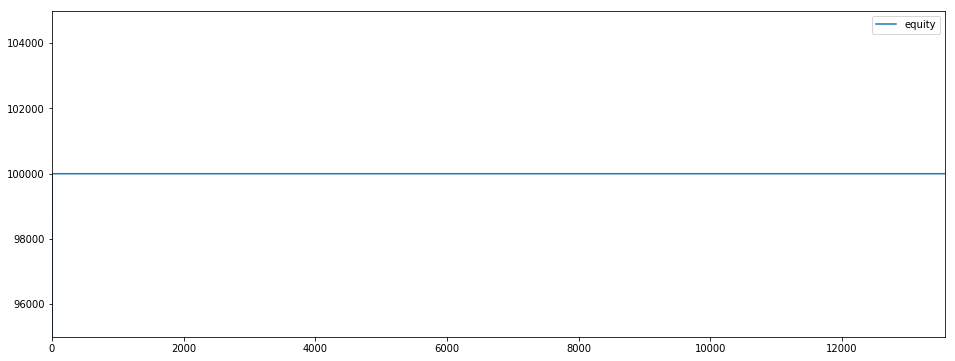

In [98]:
plt.figure(figsize=(16,6))
backtest_graph['equity'].plot(ylim=95000)
plt.legend()

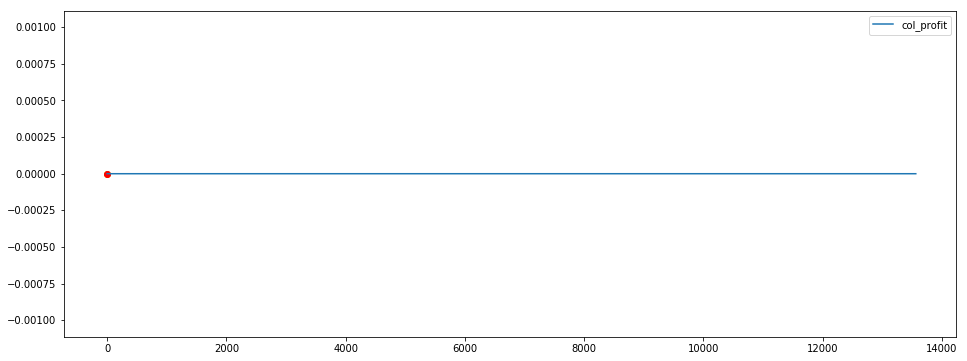

In [99]:
plt.figure(figsize=(16,6))
plt.plot(backtest_graph['col_profit'])
plt.scatter(max_gain[0],max_gain[1],c='y')
plt.scatter(max_loss[0],max_loss[1],c='r')
plt.legend()

In [100]:
print('Score Train : ',score_train,'%')
print('Score Test : ',score_test,'%')
print('Transaction à $100,000')
print('Gain généré',round(equity-100000,2))
print('Nombre de transactions : ',nb_transactions)
print('Fees : ',nb_transactions*1.5)
print('Nombre de positions gagnées',sum(col_is_win))
print('Nombre de positions perdues',sum(col_close_pos)-sum(col_is_win))
print('Gain maximal',round(max(col_profit),2),' ',round(max_gain[1],2))
print('Perte maximale',round(min(col_profit),2),' ',round(max_loss[1],2))
print('Moyenne du gain',statistics.mean(col_profit))
print('Somme de tous les gains',round(gain_sum,2))
print('Somme de tous le loss',round(abs(loss_sum),2))
print('profit factor',round(abs(gain_sum/loss_sum),2))


Score Train :  95.38 %
Score Test :  100.0 %
Transaction à $100,000
Gain généré 0
Nombre de transactions :  0
Fees :  0.0
Nombre de positions gagnées 0
Nombre de positions perdues 0
Gain maximal 0   0
Perte maximale 0   0
Moyenne du gain 0
Somme de tous les gains 0
Somme de tous le loss 0


ZeroDivisionError: division by zero

In [34]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(boost, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)